In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs

In [2]:
matrix = np.loadtxt("ex2data2.txt", delimiter=",")
X = matrix[:, :-1]
y = matrix[:, -1]

## Visualize Data

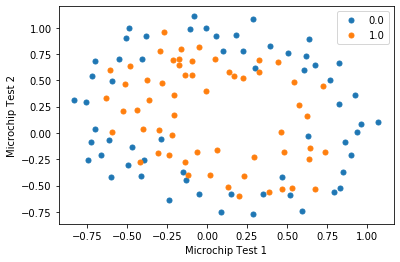

In [3]:
micro1 = X[:,0]
micro2 = X[:,1]

# set labels within a dataframe
df = pd.DataFrame(dict(x=micro1, y=micro2, label=y))
groups = df.groupby('label')

# plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)

# set plot characterisitcs
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
leg = ax.legend(loc="upper right")

plt.show()

## Implement Regularized Logistic Regression 

Map features so you get a 28-length vector of:
  - x1, x2, x1x2, x1^2, x2^2, x1x2^2, etc...

In [4]:
DEGREES = 6

def map_features(X1, X2):  

    mapped_X = []
    for i in range(DEGREES+1):
        for j in range(i+1):
            new_feature = (X1**(i-j)) * (X2**j)
            mapped_X.append(new_feature)
    
    return mapped_X
        

In [5]:
mapped_X = map_features(X[:, 0], X[:,1])

Create regularized cost function 
  - 1/m * sum([-ylog(h) - (1-y)log(1-h)]) + (lamda/2m)*sum(theta^2)

In [6]:
init_theta = np.zeros(X.shape[1] + 1)
lam = 1
m = len(X)

x_ones = np.ones(len(X)) # create ones column for x
X = np.column_stack((x_ones, X)) # merge

In [7]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    
    return g  

In [8]:
def cost_func_logReg_regularized(theta, X, y, lam, m):
    epsilon = 1e-5 # prevents log(0)
    J = 0

    h = sigmoid(X.dot(theta.transpose()))
    first_term = -(y).dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1-h + epsilon)) 
    reg_term = (lam/(2*m)) * sum(theta[1:]**2) # do not regularize theta[0]
    J = 1/m * first_term + reg_term
    
    return J


def get_gradient(theta, X, y, lam, m):
    grad = np.zeros(init_theta.size)
    
    h = sigmoid(X.dot(theta.transpose()))
    errors = h - y
    
    grad[0] = (1/m) * (X[:, 0].transpose().dot(errors)) 
    grad[1:] = (1/m) * (X[:, 1:].transpose().dot(errors))+ ((lam/m) * theta[1:])
    
    return grad


In [9]:
J = cost_func_logReg_regularized(init_theta, X, y, lam, m)
print(J) # cost should equal 0.693 

0.6931271807599427


In [10]:
# optimization function
# pass (cost function, initial theta, gradient function (optional), func args, max iterations)
theta = fmin_bfgs(cost_func_logReg_regularized, init_theta,  args=(X,y,lam,m), maxiter=400)

Optimization terminated successfully.
         Current function value: 0.690563
         Iterations: 13
         Function evaluations: 70
         Gradient evaluations: 14
